# **REAL ESTATE PRICE PREDICTION**


## DATA EXTRACTION

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pratyushpuri/pan-india-property-listings-2025-real-estate-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pan-india-property-listings-2025-real-estate-data' dataset.
Path to dataset files: /kaggle/input/pan-india-property-listings-2025-real-estate-data


In [2]:
import os

# List all files in the dataset folder
os.listdir("/kaggle/input/pan-india-property-listings-2025-real-estate-data")

['train_part1.csv',
 'train_part2.csv',
 'test_part2.xlsx',
 'test_part1.json',
 'train_part2.json',
 'train_part1.xlsx',
 'train_part2.xlsx',
 'metadata.json',
 'test_part2.json',
 'test_part1.csv',
 'test_part2.csv',
 'test_part1.xlsx',
 'train_part1.json']

In [3]:
import pandas as pd
import numpy as np

In [4]:

df1 = pd.read_csv("/kaggle/input/pan-india-property-listings-2025-real-estate-data/train_part1.csv")
df1.head()

,ListingID,City,Locality,PropertyType,BHK,Bathrooms,Balconies,Furnishing,SuperBuiltUpArea_sqft,BuiltUpArea_sqft,...,BuildingType,YearBuilt,AgeYears,Facing,AmenitiesCount,IsRERARegistered,RERAID,Latitude,Longitude,Price_INR
0,HP01139,Bengaluru,NaN,Villa,3,3.0,2.0,Semi-Furnished,1576,1299,...,Bungalow,2018.0,7,South-East,3,True,BEN-RERA-9928-63,12.877154,77.656243,17770000
1,HP01630,Kolkata,Rajarhat,Apartment,1,2.0,1.0,Unfurnished,1098,870,...,Mid Rise,2010.0,15,North-West,9,True,KOL-RERA-6820-36,22.584035,88.440364,7130000
2,HP01608,Kolkata,Salt Lake,Apartment,1,2.0,3.0,Unfurnished,863,710,...,High Rise,2006.0,19,South,6,True,KOL-RERA-5304-84,22.535687,88.416707,5920000
3,HP01979,MMR,Goregaon East,Apartment,2,3.0,NaN,Furnished,1135,952,...,High Rise,2025.0,0,North-East,7,False,NaN,NaN,72.877790,19140000
4,HP01399,Hyderabad,Madhapur,Apartment,3,4.0,1.0,Semi-Furnished,2662,2176,...,Standalone Building,2010.0,15,North,6,True,HYD-RERA-7537-95,17.444963,78.431430,20300000


In [5]:
df2 = pd.read_csv("/kaggle/input/pan-india-property-listings-2025-real-estate-data/train_part2.csv")
df2.head()

,ListingID,City,Locality,PropertyType,BHK,Bathrooms,Balconies,Furnishing,SuperBuiltUpArea_sqft,BuiltUpArea_sqft,...,BuildingType,YearBuilt,AgeYears,Facing,AmenitiesCount,IsRERARegistered,RERAID,Latitude,Longitude,Price_INR
0,HP01287,Bengaluru,Banashankari,Apartment,3,3.0,2.0,Semi-Furnished,1816,1386,...,Standalone Building,2018.0,7,South,9,True,BEN-RERA-3063-23,12.822958,77.759009,15060000
1,HP01726,Delhi NCR,Faridabad-Sector 21,Apartment,2,2.0,2.0,Semi-Furnished,1579,1205,...,Standalone Building,2009.0,16,South-West,8,True,DEL-RERA-8739-21,28.563276,76.992152,12570000
2,HP01011,Pune,Hinjawadi,Independent House,3,3.0,1.0,Unfurnished,2073,1711,...,Standalone Building,2014.0,11,North-East,4,True,PUN-RERA-4033-88,18.468168,NaN,17470000
3,HP00910,Chennai,Velachery,Villa,4,5.0,1.0,Unfurnished,3637,3031,...,Bungalow,2006.0,19,North-West,5,True,CHE-RERA-9763-53,12.922412,80.312701,36280000
4,HP01536,Chennai,T Nagar,Penthouse,6,7.0,2.0,Unfurnished,3973,2982,...,High Rise,2008.0,17,North,7,True,CHE-RERA-8666-20,13.061543,80.329035,36640000


The target variable is available in the files train1 and train2 which have been extracted to df1 and df2. Merging these two dataframes for analysis.

In [6]:
df = pd.concat([df1, df2], ignore_index=True)

In [7]:
df.head()

,ListingID,City,Locality,PropertyType,BHK,Bathrooms,Balconies,Furnishing,SuperBuiltUpArea_sqft,BuiltUpArea_sqft,...,BuildingType,YearBuilt,AgeYears,Facing,AmenitiesCount,IsRERARegistered,RERAID,Latitude,Longitude,Price_INR
0,HP01139,Bengaluru,NaN,Villa,3,3.0,2.0,Semi-Furnished,1576,1299,...,Bungalow,2018.0,7,South-East,3,True,BEN-RERA-9928-63,12.877154,77.656243,17770000
1,HP01630,Kolkata,Rajarhat,Apartment,1,2.0,1.0,Unfurnished,1098,870,...,Mid Rise,2010.0,15,North-West,9,True,KOL-RERA-6820-36,22.584035,88.440364,7130000
2,HP01608,Kolkata,Salt Lake,Apartment,1,2.0,3.0,Unfurnished,863,710,...,High Rise,2006.0,19,South,6,True,KOL-RERA-5304-84,22.535687,88.416707,5920000
3,HP01979,MMR,Goregaon East,Apartment,2,3.0,NaN,Furnished,1135,952,...,High Rise,2025.0,0,North-East,7,False,NaN,NaN,72.877790,19140000
4,HP01399,Hyderabad,Madhapur,Apartment,3,4.0,1.0,Semi-Furnished,2662,2176,...,Standalone Building,2010.0,15,North,6,True,HYD-RERA-7537-95,17.444963,78.431430,20300000


In [8]:
df.tail(10)

,ListingID,City,Locality,PropertyType,BHK,Bathrooms,Balconies,Furnishing,SuperBuiltUpArea_sqft,BuiltUpArea_sqft,...,BuildingType,YearBuilt,AgeYears,Facing,AmenitiesCount,IsRERARegistered,RERAID,Latitude,Longitude,Price_INR
4718,HP01994,Bengaluru,Hebbal,Independent House,2,2.0,1.0,Furnished,1049,840,...,Low Rise,2004.0,21,East,7,True,BEN-RERA-9640-24,12.801159,77.713783,8400000
4719,HP02277,Bengaluru,Marathahalli,Apartment,3,3.0,3.0,Semi-Furnished,1725,1440,...,Mid Rise,2025.0,0,East,7,False,NaN,12.956339,77.570840,20590000
4720,HP01974,Kolkata,Jadavpur,Villa,4,4.0,1.0,Semi-Furnished,2437,1816,...,Standalone Building,2012.0,13,South-West,8,True,KOL-RERA-2058-69,22.505325,88.458146,21420000
4721,HP01283,MMR,Bandra West,Apartment,2,3.0,1.0,Furnished,1352,1111,...,Standalone Building,2023.0,2,South-East,6,True,MMR-RERA-8074-37,18.903178,72.771991,20080000
4722,HP00082,MMR,Navi Mumbai-Kharghar,Row House,1,1.0,1.0,Semi-Furnished,715,536,...,Bungalow,2010.0,15,North-West,6,True,MMR-RERA-8984-58,19.134481,72.876869,11080000
4723,HP00733,Chennai,Porur,Penthouse,4,5.0,3.0,Unfurnished,2670,2228,...,High Rise,2008.0,17,South-East,9,True,CHE-RERA-1823-72,13.077017,80.344260,26250000
4724,HP00905,Hyderabad,Kukatpally,Villa,5,5.0,3.0,Furnished,5077,4181,...,Standalone Building,2004.0,21,West,9,True,HYD-RERA-4007-79,17.460544,78.436887,48420000
4725,HP00542,Delhi NCR,Noida-Sector 62,Apartment,3,3.0,1.0,Unfurnished,2092,1590,...,Gated Community,1997.0,28,North,10,False,NaN,28.776437,77.033101,16880000
4726,HP01215,MMR,Vile Parle,Apartment,2,3.0,2.0,Semi-Furnished,1083,905,...,Mid Rise,2010.0,15,North-West,7,True,MMR-RERA-7553-86,19.060848,72.800001,17560000
4727,HP00443,Chennai,OMR,Apartment,1,2.0,3.0,Unfurnished,900,709,...,Gated Community,1999.0,26,South-East,9,True,CHE-RERA-2546-26,13.187485,80.307801,7810000


## DATA AUDITING/AVAILABILITY

In [9]:
# Shape of the dataset (Rows,Columns)
df.shape

(4728, 24)

In [10]:
# Information about name of columns, datatypes, non-null enteries and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4728 entries, 0 to 4727
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ListingID              4728 non-null   object 
 1   City                   4678 non-null   object 
 2   Locality               4658 non-null   object 
 3   PropertyType           4728 non-null   object 
 4   BHK                    4728 non-null   int64  
 5   Bathrooms              4674 non-null   float64
 6   Balconies              4628 non-null   float64
 7   Furnishing             4645 non-null   object 
 8   SuperBuiltUpArea_sqft  4728 non-null   int64  
 9   BuiltUpArea_sqft       4728 non-null   int64  
 10  CarpetArea_sqft        4728 non-null   int64  
 11  Floor                  4728 non-null   int64  
 12  TotalFloors            4728 non-null   int64  
 13  Parking                4288 non-null   object 
 14  BuildingType           4728 non-null   object 
 15  Year

In [11]:
# Null/missing values count in a variable
df.isnull().sum()

,0
ListingID,0
City,50
Locality,70
PropertyType,0
BHK,0
Bathrooms,54
Balconies,100
Furnishing,83
SuperBuiltUpArea_sqft,0
BuiltUpArea_sqft,0


In [12]:
# Missing value percent for each attribute
(df.isnull().sum()*100)/df.shape[0]

,0
ListingID,0.000000
City,1.057530
Locality,1.480541
PropertyType,0.000000
BHK,0.000000
Bathrooms,1.142132
Balconies,2.115059
Furnishing,1.755499
SuperBuiltUpArea_sqft,0.000000
BuiltUpArea_sqft,0.000000


In [13]:
# Finding duplicate records
df[df.duplicated()]

,ListingID,City,Locality,PropertyType,BHK,Bathrooms,Balconies,Furnishing,SuperBuiltUpArea_sqft,BuiltUpArea_sqft,...,BuildingType,YearBuilt,AgeYears,Facing,AmenitiesCount,IsRERARegistered,RERAID,Latitude,Longitude,Price_INR


In [14]:
# Unique counts in each variable
unique_count = {}
for col in df.columns:
    unique_count[col] = df[col].nunique()

unique_count_df = pd.DataFrame(list(unique_count.items()), columns=['Columns','Unique Count'])
unique_count_df

,Columns,Unique Count
0,ListingID,2364
1,City,8
2,Locality,59
3,PropertyType,6
4,BHK,7
5,Bathrooms,7
6,Balconies,4
7,Furnishing,3
8,SuperBuiltUpArea_sqft,2512
9,BuiltUpArea_sqft,2186


According the problem statement, the house price is influenced by its location, size, layout, usable space, age and the amenities it provides to a buyer
In that sense, we have attributes: no. of bedrooms(BHK), bathrooms, balconies, amenities, size of the house(area per square feet) and location (city, locality, longitude, latitude), as well as age of the house in construction year and age in years, also condition of furnishing, building type and floors.  
Sufficient number of features are available to predict the target variable-Price

## EXPLORATORY DATA ANALYSIS (EDA)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Statistical summary
df.describe()

,BHK,Bathrooms,Balconies,SuperBuiltUpArea_sqft,BuiltUpArea_sqft,CarpetArea_sqft,Floor,TotalFloors,YearBuilt,AgeYears,AmenitiesCount,Latitude,Longitude,Price_INR
count,4728.000000,4674.000000,4628.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4689.000000,4728.000000,4728.000000,4678.000000,4669.000000,4.728000e+03
mean,2.551819,3.228070,1.524417,1976.857234,1563.064086,1333.160321,6.516286,12.504653,2014.146726,10.856176,7.022208,19.374590,77.571982,1.853415e+07
std,1.278891,1.243935,0.706609,1042.352626,809.452530,673.568980,7.375319,10.698632,7.427250,7.424854,1.590023,4.967147,4.736063,1.276603e+07
min,0.000000,1.000000,0.000000,406.000000,336.000000,300.000000,0.000000,1.000000,1985.000000,0.000000,3.000000,12.800641,72.400121,2.000000e+06
25%,2.000000,2.000000,1.000000,1237.000000,989.000000,854.000000,1.000000,4.000000,2009.000000,5.000000,6.000000,13.186363,73.753105,1.007000e+07
50%,3.000000,3.000000,1.000000,1765.000000,1404.500000,1208.000000,4.000000,9.000000,2015.000000,10.000000,7.000000,18.643519,77.462390,1.531000e+07
75%,3.000000,4.000000,2.000000,2512.000000,1992.250000,1702.000000,9.000000,18.000000,2020.000000,16.000000,8.000000,22.906225,78.594666,2.333000e+07
max,6.000000,7.000000,3.000000,6896.000000,5297.000000,4185.000000,39.000000,40.000000,2025.000000,40.000000,12.000000,28.799692,88.499776,1.342000e+08


### Univariate Analysis

- Countplot
- kde
- boxplot
- Bar

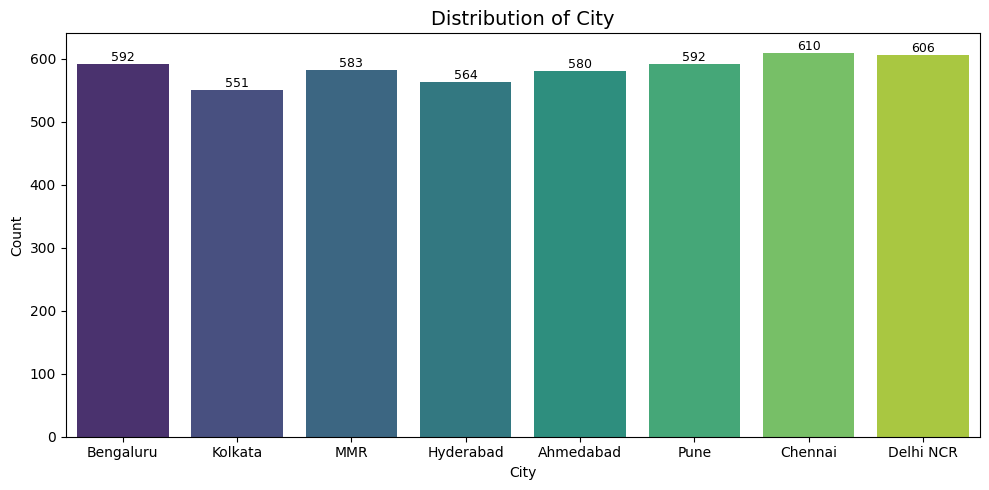

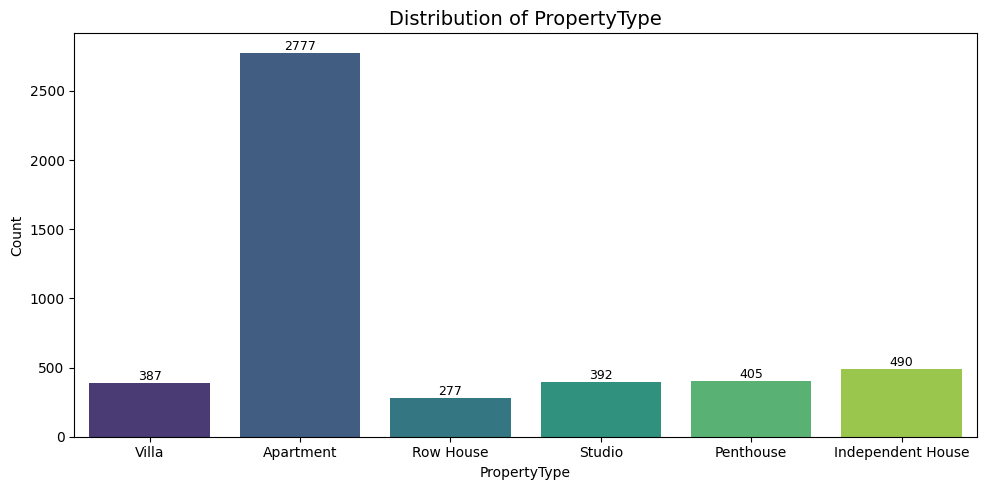

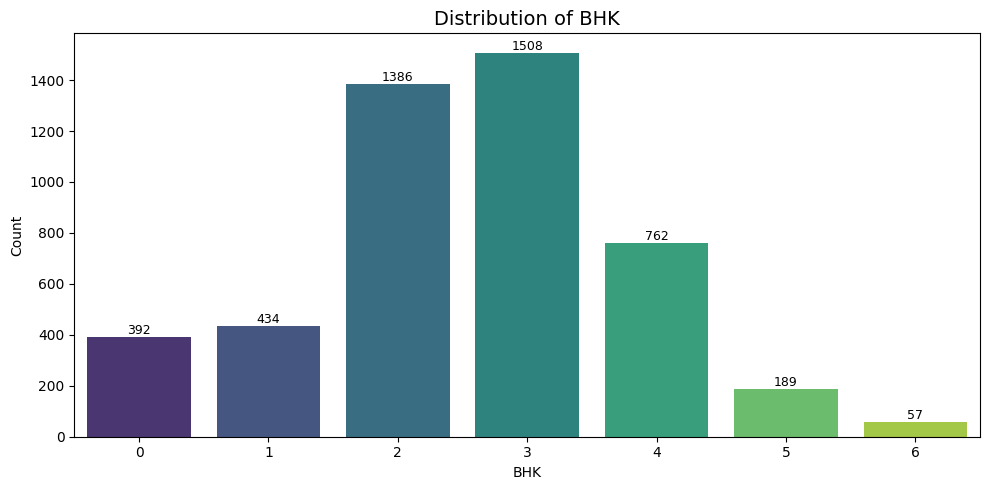

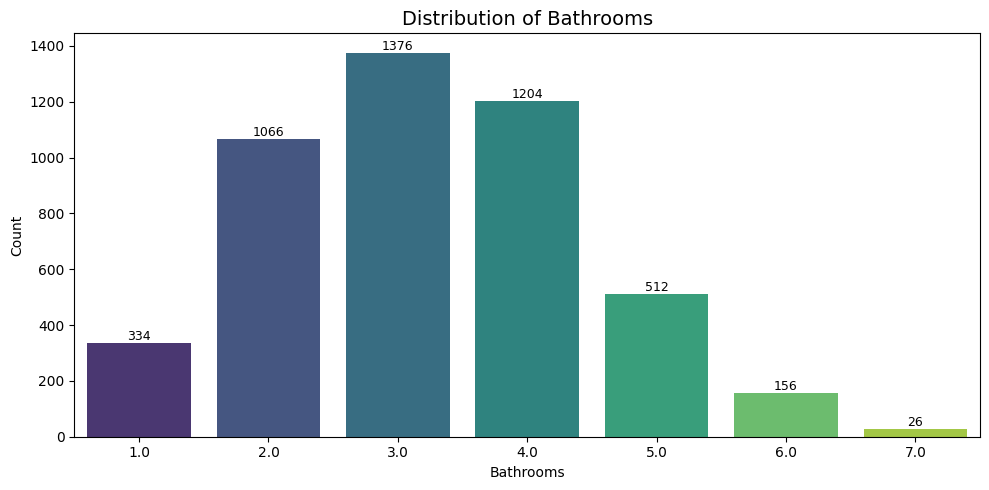

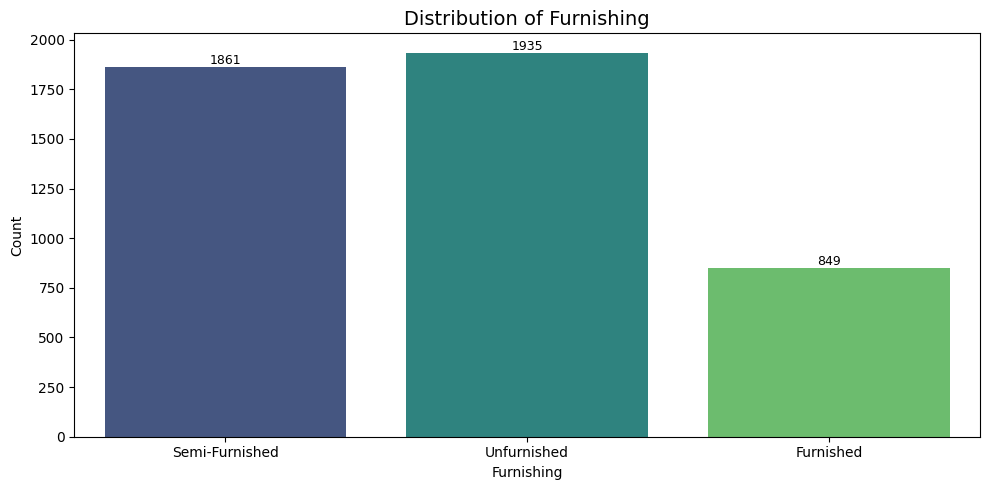

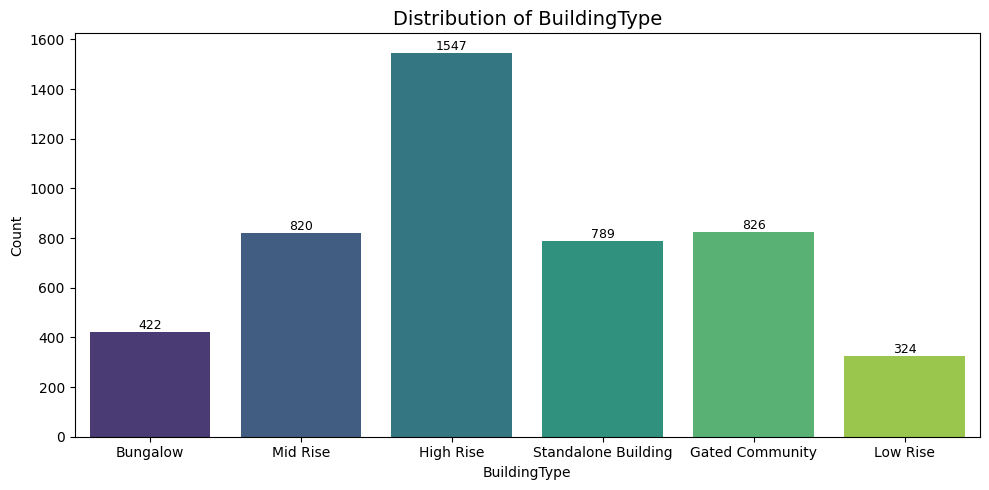

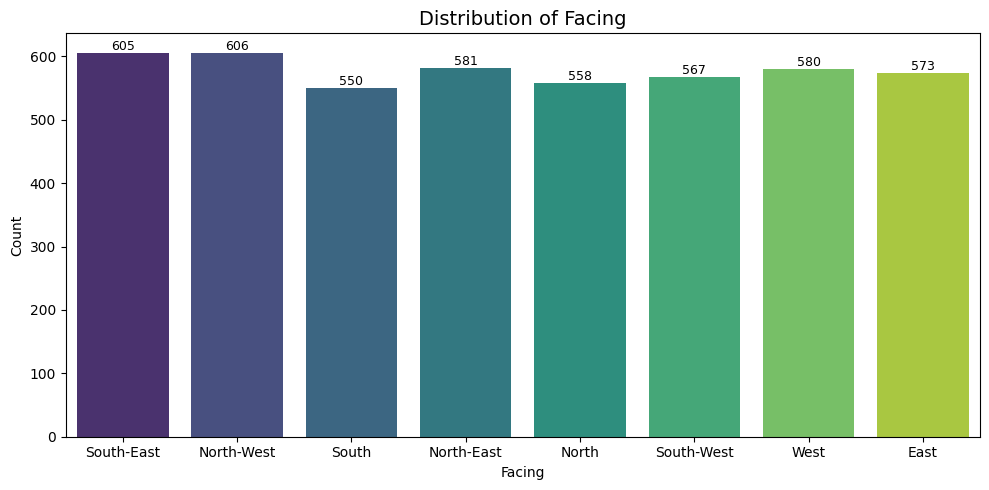

In [18]:
columns = ['City', 'PropertyType', 'BHK', 'Bathrooms',
           'Furnishing', 'BuildingType', 'Facing']

for col in columns:
    plt.figure(figsize=(10, 5))

    # Create bar plot
    ax = sns.countplot(data=df, x=col, palette='viridis')

    # Add count labels on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

-the cities with a high number of houses listed were Chennai, Delhi, Bengaluru and Ahmedabad  
-the number of apartments listed was 2777, almost half of the dataset  
-3 BHK followed by 2 BHK constitutes majority of the dataset  
-the no. of bathrooms with highest count is 3, followed by 4 and 2  
-almost 80% of the data has either unfurnished or semi-furnished houses listed  
-Building type ranking -> High rise, gated community, Mid rise, Standalone, bungalow and low rise  
-houses listed are almost equally distributed in either directions

<Figure size 600x400 with 0 Axes>

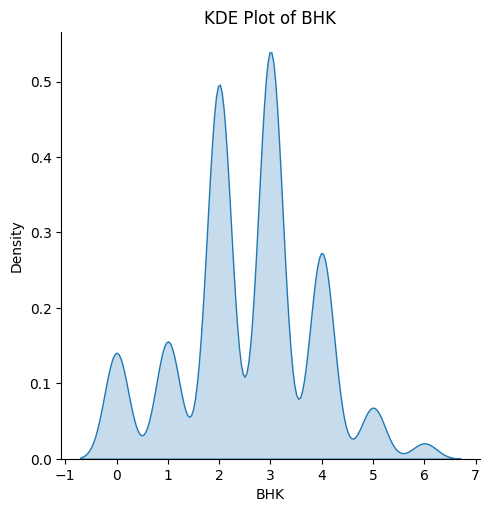

<Figure size 600x400 with 0 Axes>

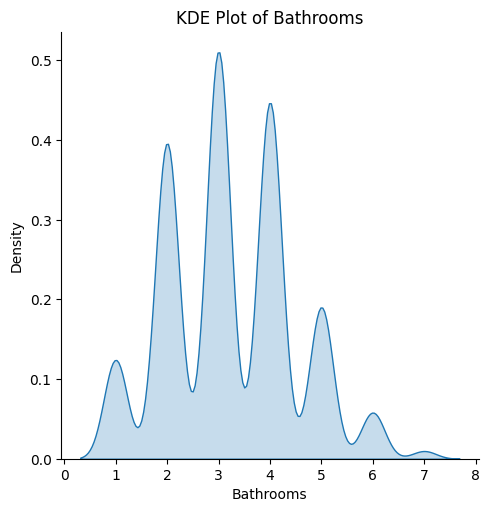

<Figure size 600x400 with 0 Axes>

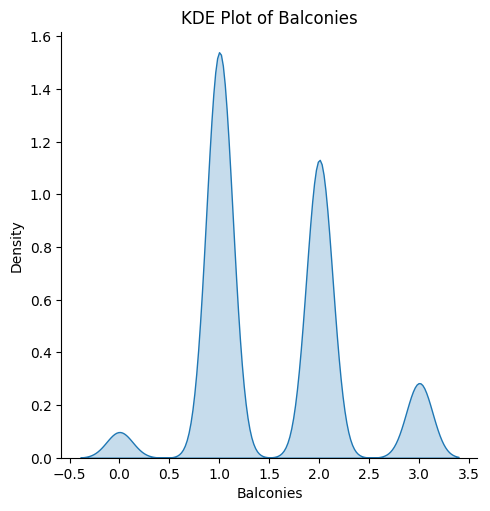

<Figure size 600x400 with 0 Axes>

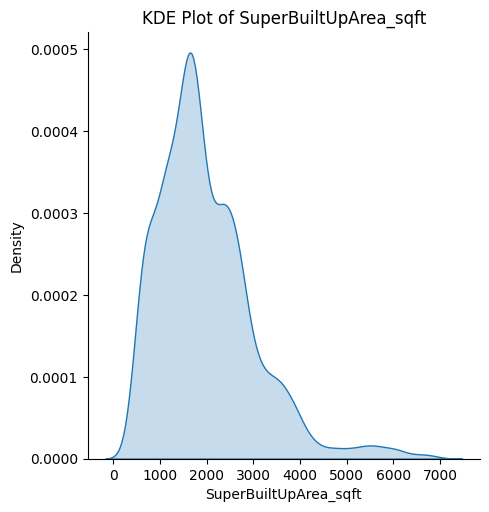

<Figure size 600x400 with 0 Axes>

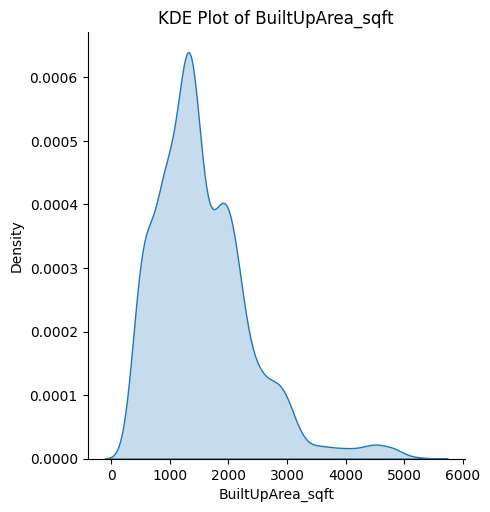

<Figure size 600x400 with 0 Axes>

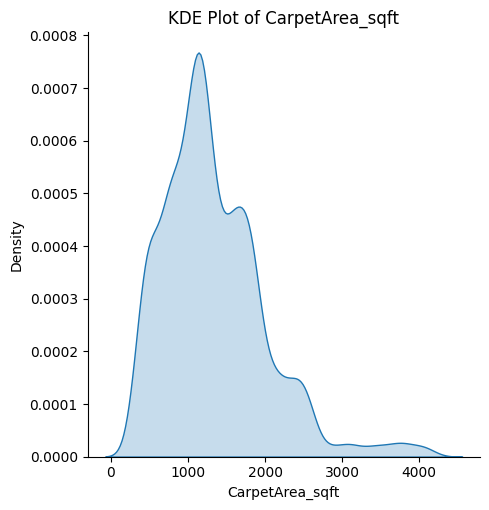

<Figure size 600x400 with 0 Axes>

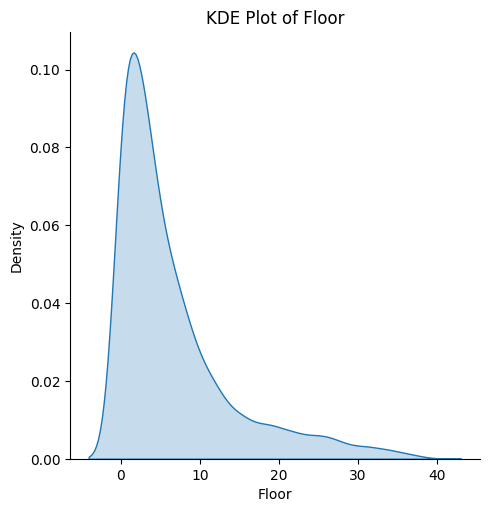

<Figure size 600x400 with 0 Axes>

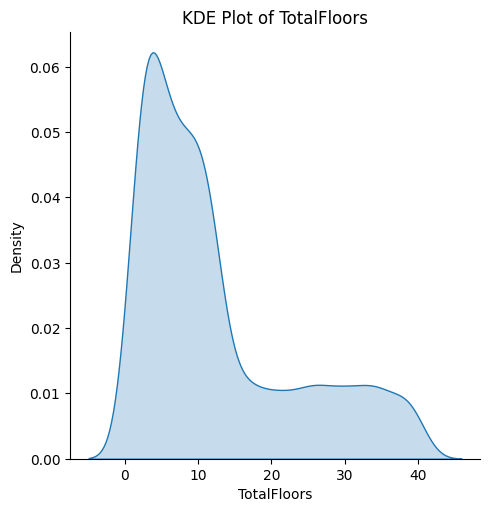

<Figure size 600x400 with 0 Axes>

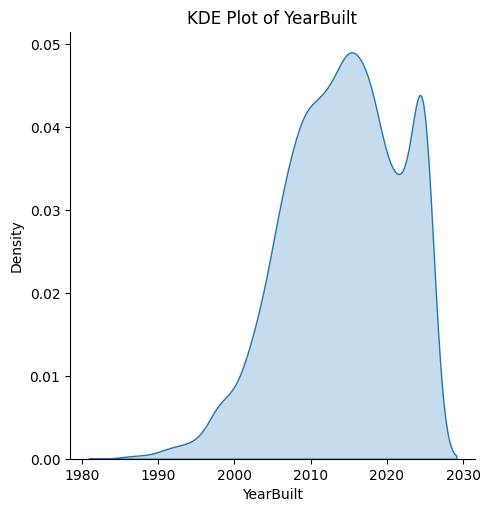

<Figure size 600x400 with 0 Axes>

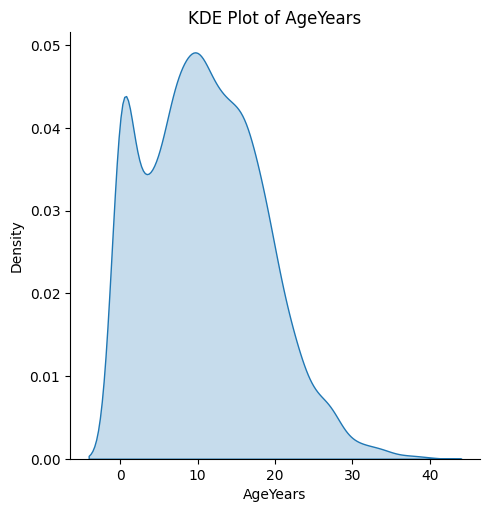

<Figure size 600x400 with 0 Axes>

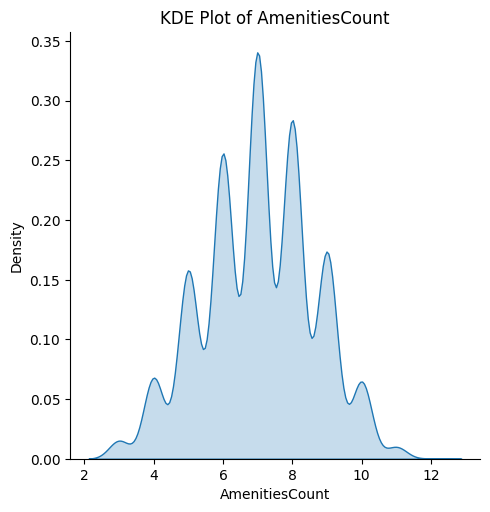

<Figure size 600x400 with 0 Axes>

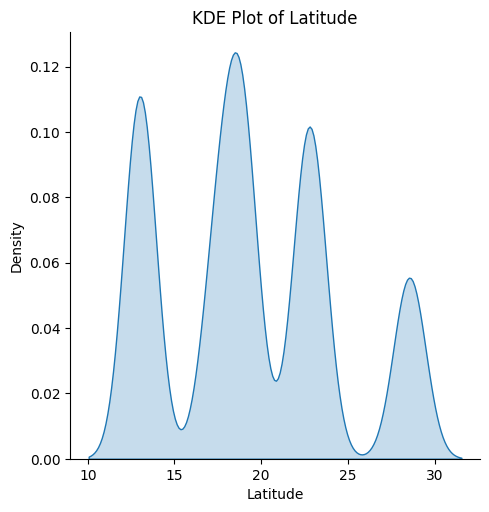

<Figure size 600x400 with 0 Axes>

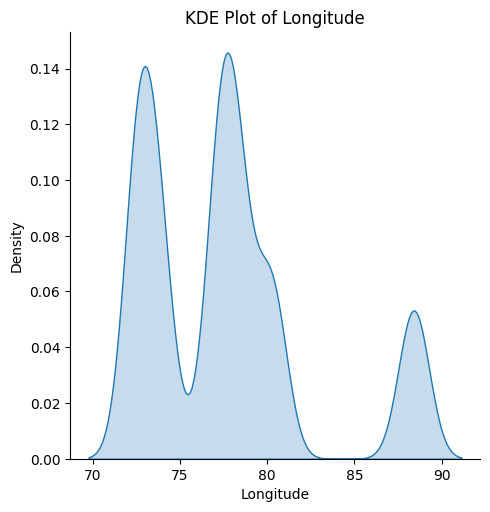

<Figure size 600x400 with 0 Axes>

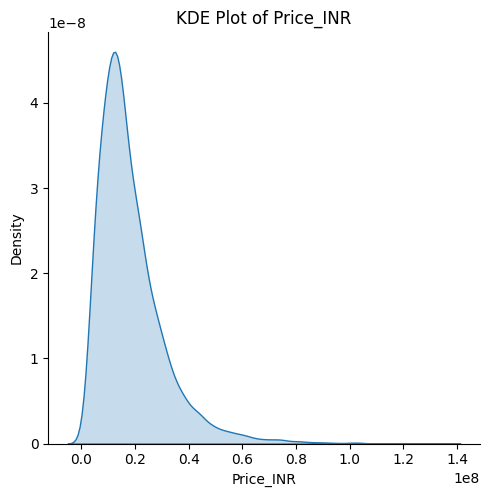

In [19]:
# KDE plot
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.displot(data=df, x=df[col], kind='kde', fill=True)
    plt.title(f'KDE Plot of {col}')
    plt.show()

- KDE plots for **Bathrooms, BHK, Balconies, AmentiesCount, Latitude, Longitutde** show multi-modal distributions with clear peaks at integer values (e.g., 2, 3, 4 for Bathrooms; 2, 3, 4 for BHK)
- Local Peaks in Longitude and Latitude shows properties are concentrated on few clusters
- KDE plot for **SuperBuiltUpArea_sqft, BuiltUpArea, CarpetArea, Floor, TotalFloors, AgeYears and Price** shows a distribution that is unimodal but highly right-skewed


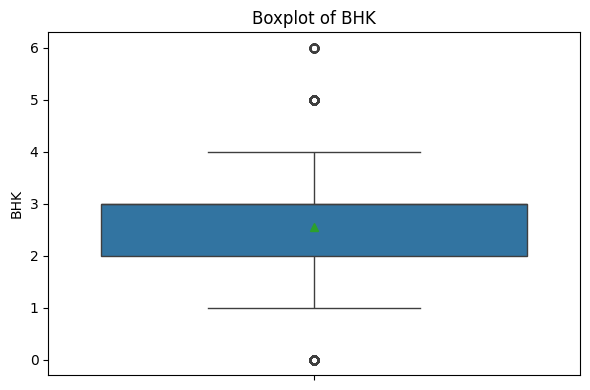

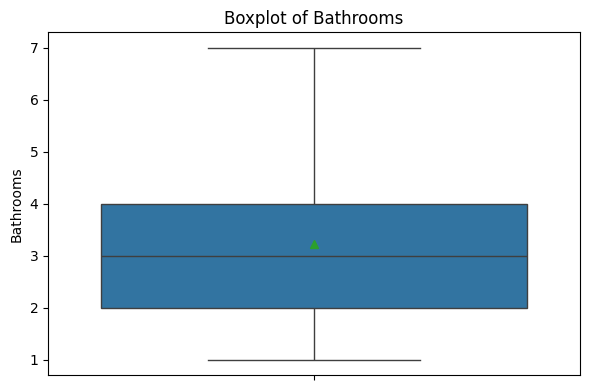

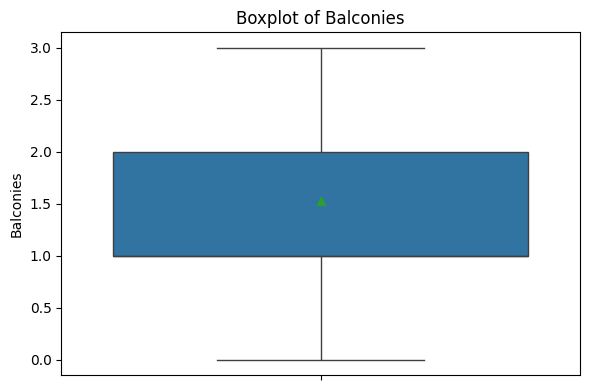

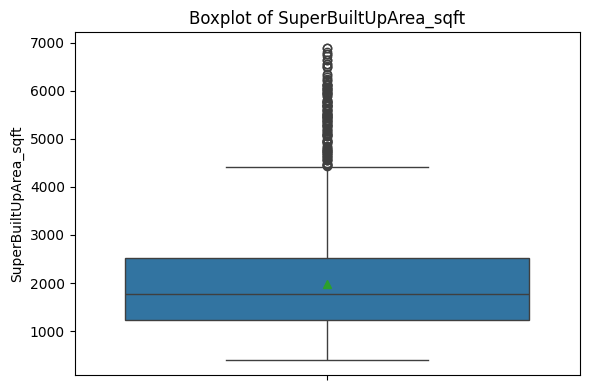

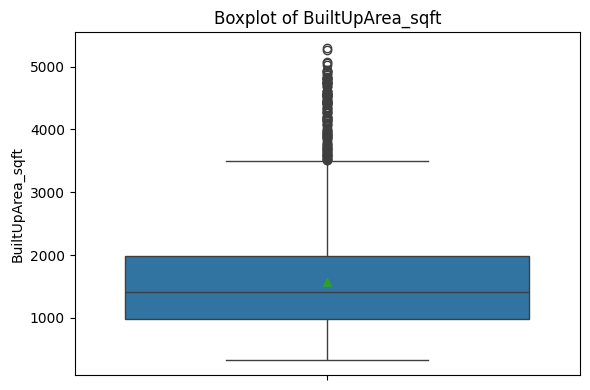

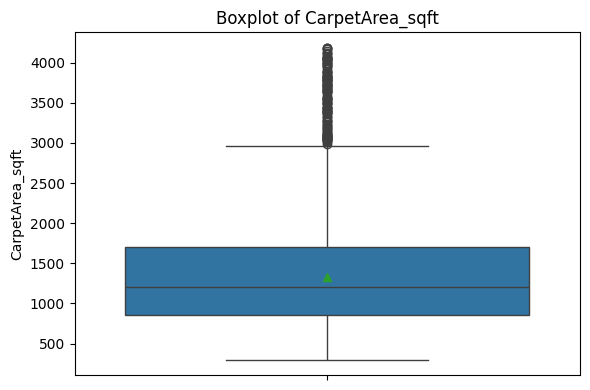

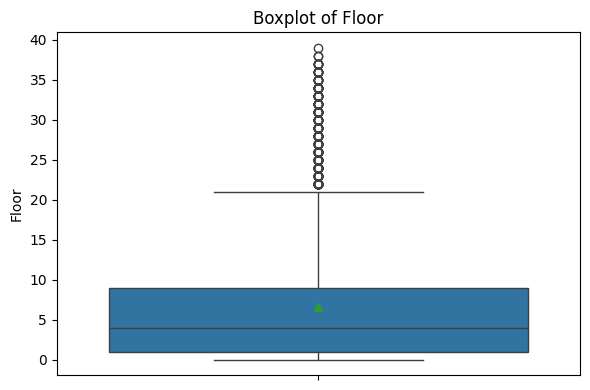

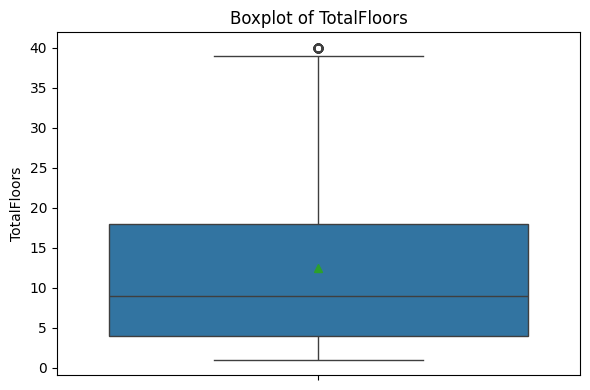

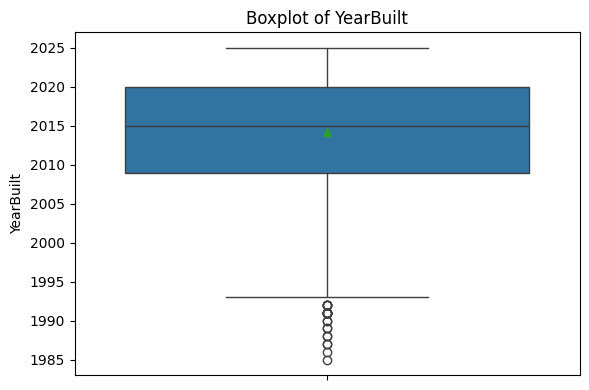

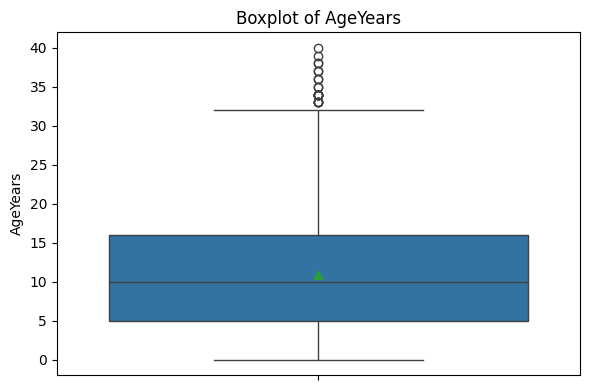

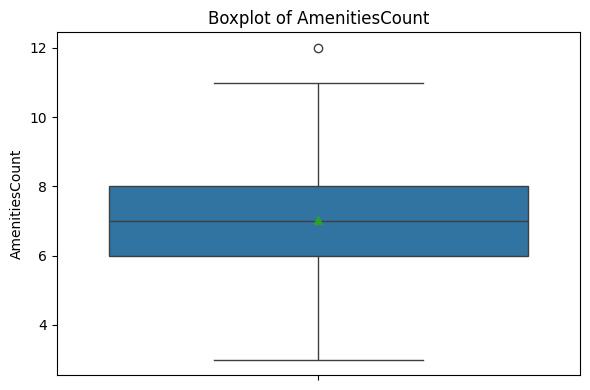

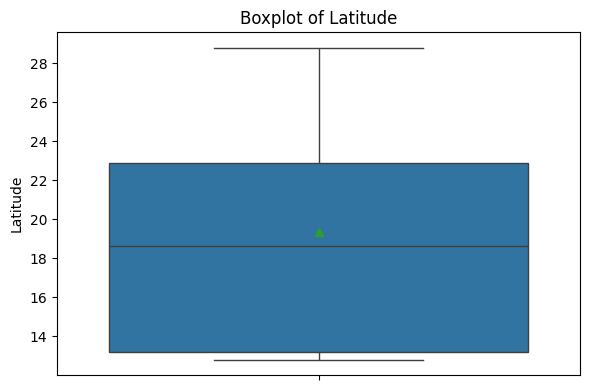

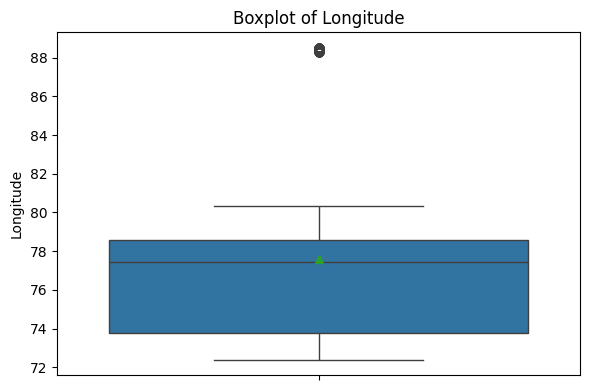

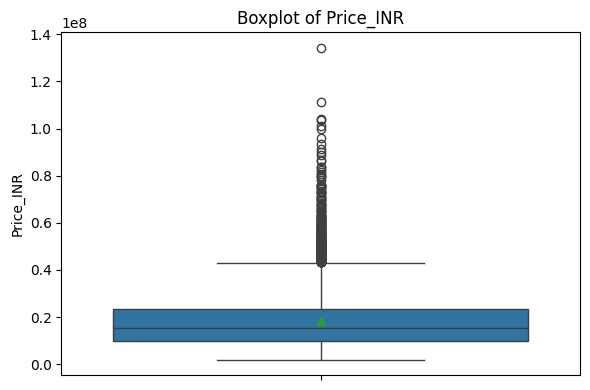

In [20]:
# Boxplot

for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[col], showmeans=True)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

### Bivariate Analysis
-Scatter Plots  
-Box Plots  
-Barplots

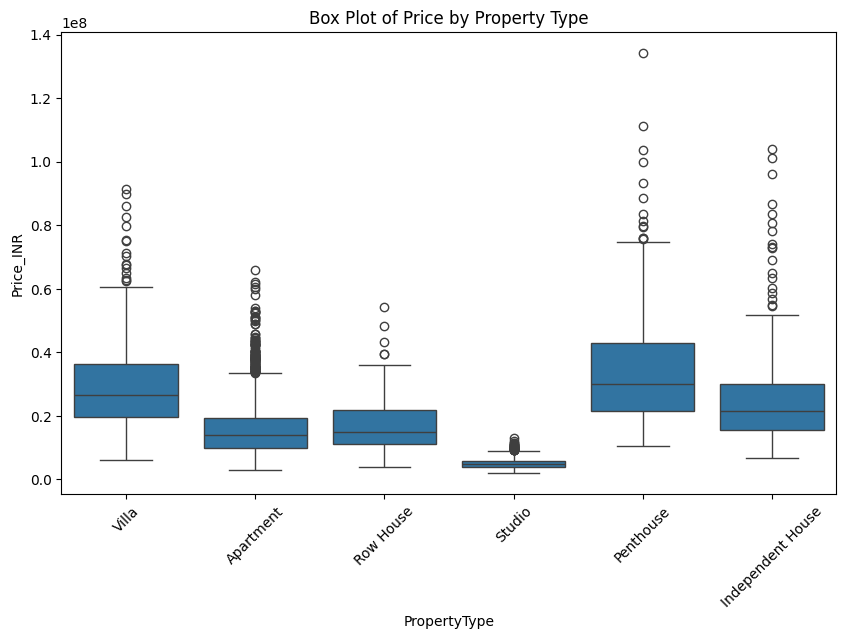

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='PropertyType', y='Price_INR', data=df)
plt.title('Box Plot of Price by Property Type')
plt.xticks(rotation=45)
plt.show()

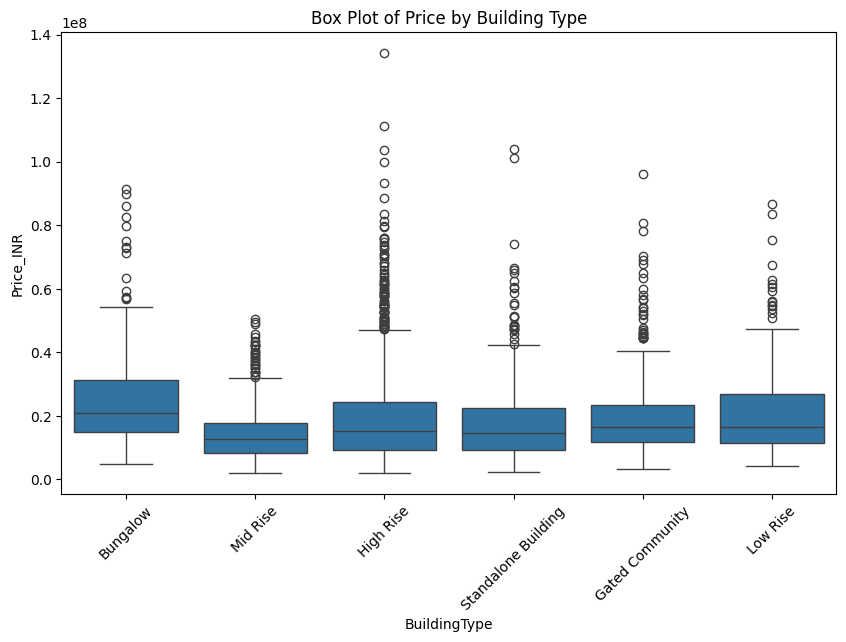

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='BuildingType', y='Price_INR', data=df)
plt.title('Box Plot of Price by Building Type')
plt.xticks(rotation=45)
plt.show()

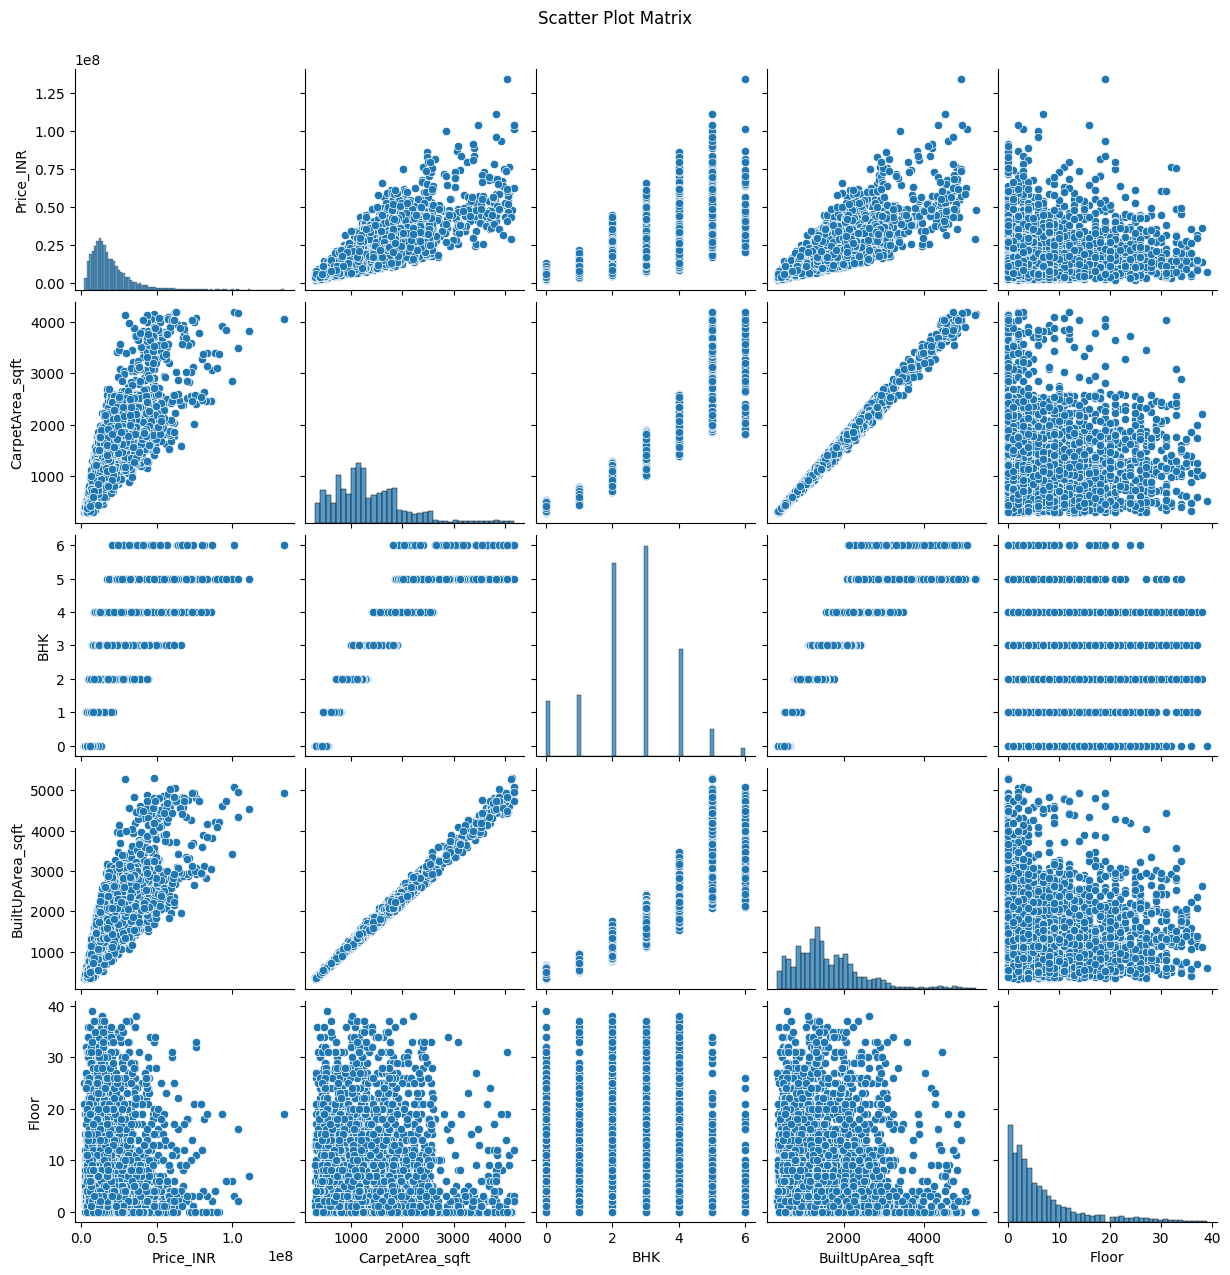

In [23]:
sns.pairplot(df[['Price_INR', 'CarpetArea_sqft', 'BHK', 'BuiltUpArea_sqft','Floor']])
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

<Axes: xlabel='AgeYears', ylabel='Price_INR'>

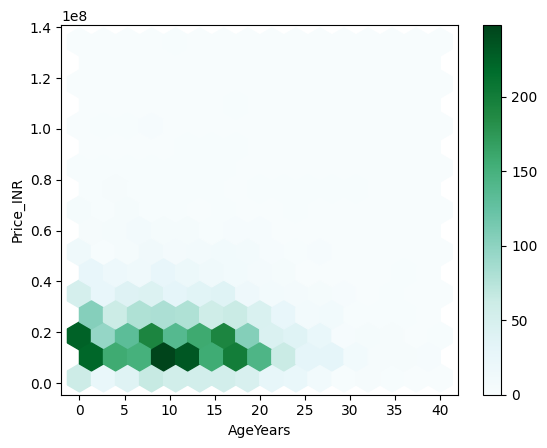

In [24]:
df.plot.hexbin(x  ='AgeYears' , y  = 'Price_INR', label = 'Price of Houses per sqft' ,gridsize = 15)

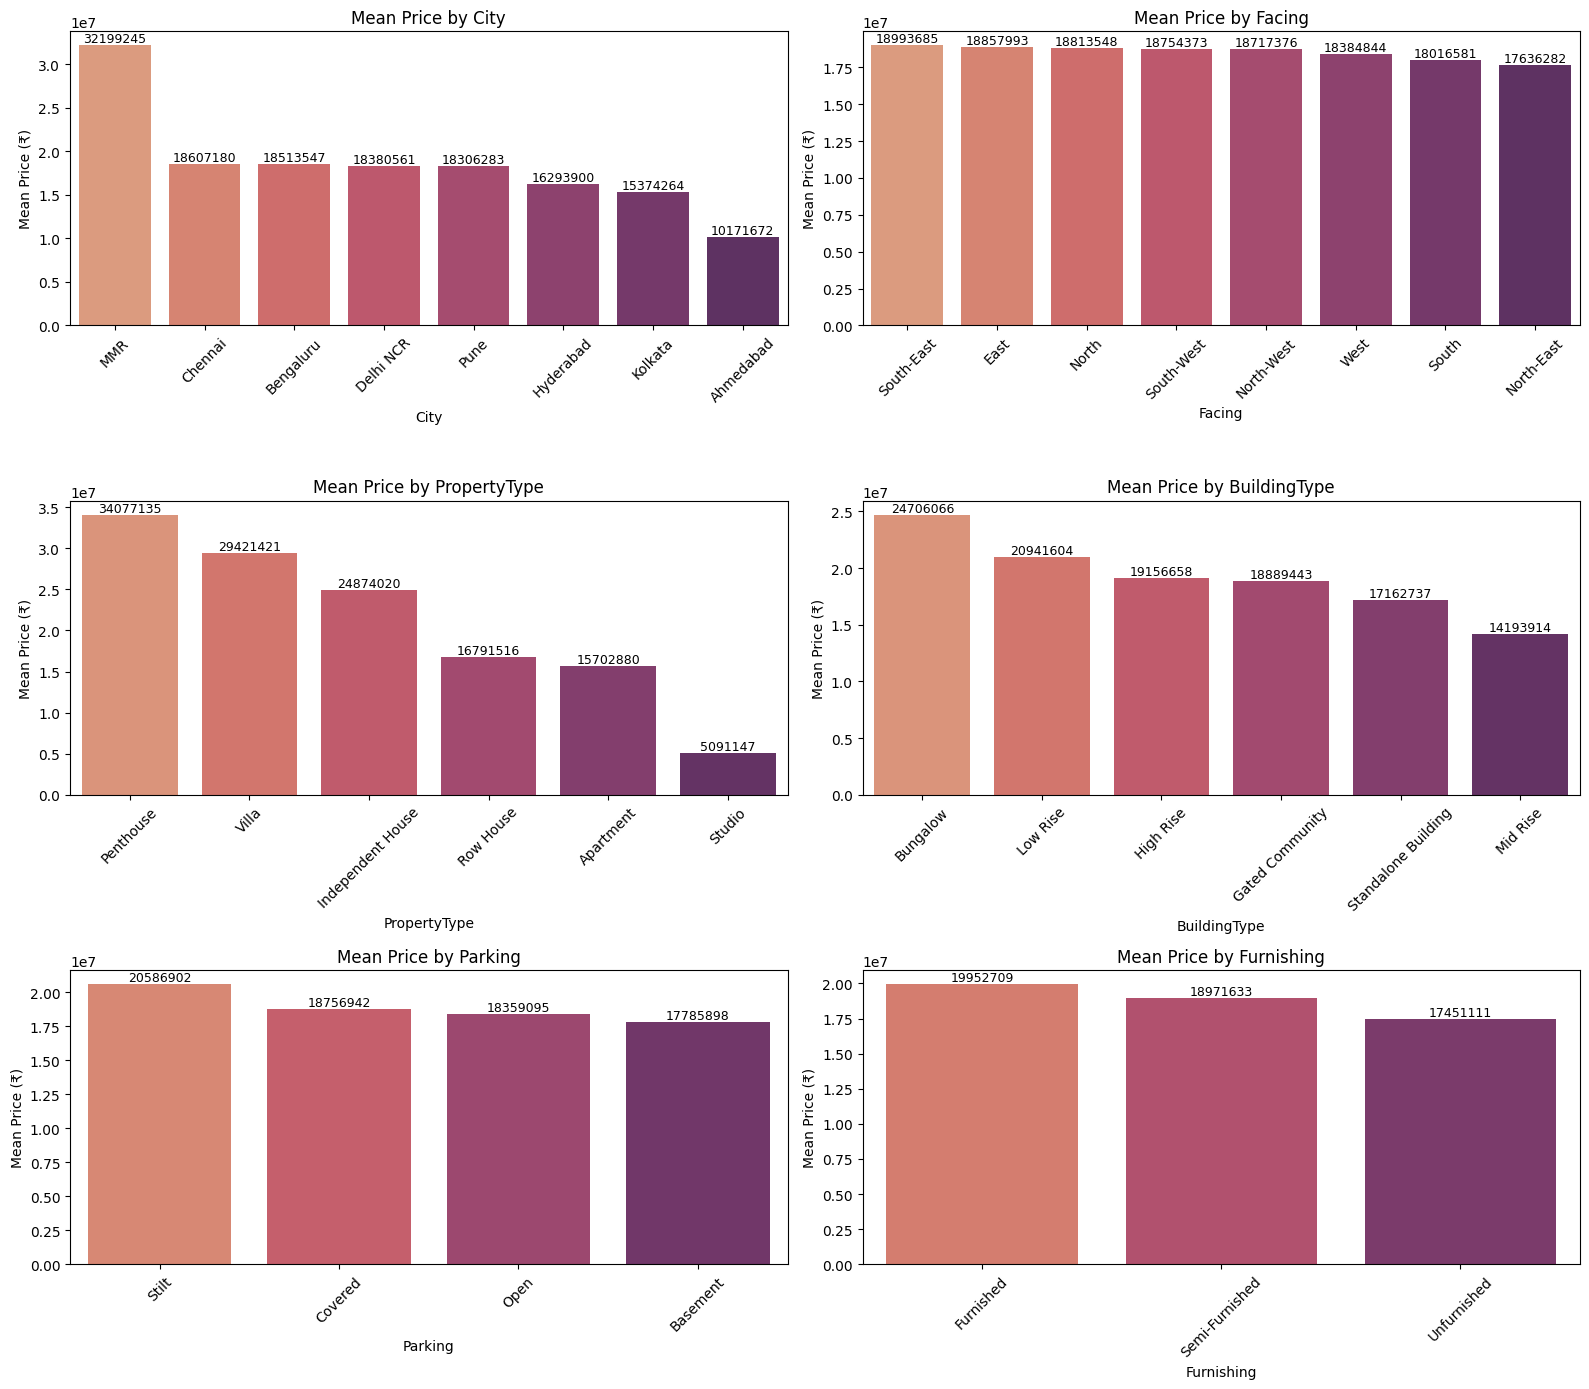

In [25]:
# Barplot

subplot_cols = ['City', 'Facing', 'PropertyType', 'BuildingType', 'Parking', 'Furnishing']

plt.figure(figsize=(16, 14))

for i, col in enumerate(subplot_cols, 1):
    plt.subplot(3, 2, i)
    mean_price = df.groupby(col)['Price_INR'].mean().reset_index().sort_values('Price_INR', ascending=False)
    ax = sns.barplot(x=col, y='Price_INR', data=mean_price, palette='flare')
    # ax = df_temp.groupby(col)['Price_INR'].mean().sort_values(ascending=False).plot(kind='bar')
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)
    plt.ylabel("Mean Price (₹)")
    plt.xticks(rotation=45)
    plt.title(f"Mean Price by {col}")

plt.tight_layout()
plt.show()


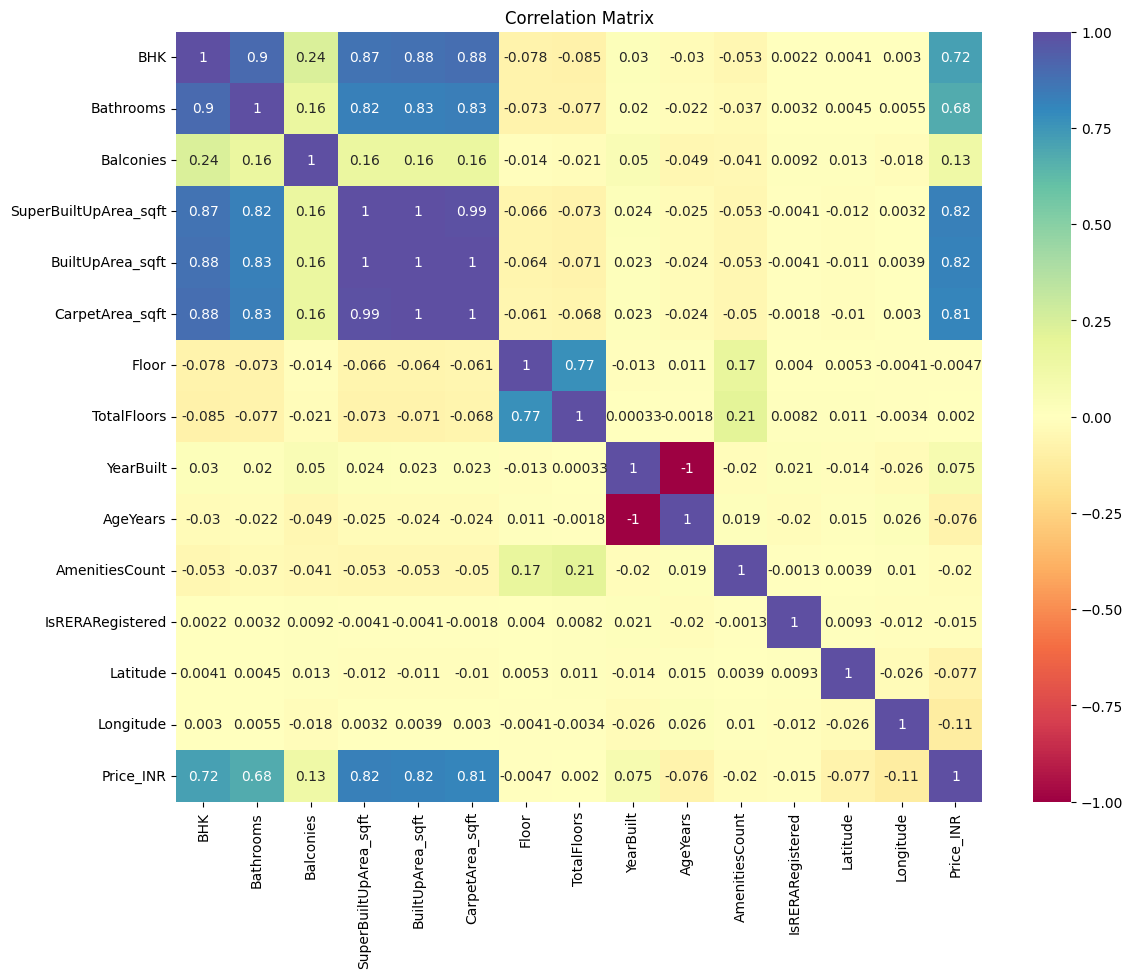

In [26]:
plt.figure(figsize=(13, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap ='Spectral')
plt.title('Correlation Matrix')
plt.show()

In the correlation matrix we can see that:-
1) SuperBuiltUpArea, BuiltUpArea and CarpetArea are highly positively correlated => if one increases the othe other increases proportionally. They provide similar information (same correlation with target variable) so to avoid multicollinearity we can drop two variables.
2) AgeYears and YearBuilt are perfectly negavtively correlated so we can drop one
3) Target Variable(Price) is highly positively correlated with BHK, Bathrooms, Area per sqft

In [27]:
df.groupby(['City','BuildingType']).size().reset_index(name='count').head(10)

,City,BuildingType,count
0,Ahmedabad,Bungalow,56
1,Ahmedabad,Gated Community,103
2,Ahmedabad,High Rise,191
3,Ahmedabad,Low Rise,43
4,Ahmedabad,Mid Rise,92
5,Ahmedabad,Standalone Building,95
6,Bengaluru,Bungalow,62
7,Bengaluru,Gated Community,109
8,Bengaluru,High Rise,192
9,Bengaluru,Low Rise,31


## DATA CLEANING

Dropping columns

In [28]:
# Another dataframe df_temp created where the tuples and attributes are dropped, data is cleaned.
df_temp = df.drop(columns=['ListingID','Locality','YearBuilt','SuperBuiltUpArea_sqft','CarpetArea_sqft','RERAID'])

Irrelevant columns - Listing Id, Locality    
Redundant Columns - Year Built, SuperBuiltUp Area, Carpet Area  
Columns with too many Missing Values - RERAID

Dropping Tuples

In [29]:
# Finding records with null values more than or equal to 3
null_counts_per_row = df_temp.isnull().sum(axis=1)
threshold = 3
records_with_many_nulls = df_temp[null_counts_per_row >= threshold]
records_with_many_nulls

,City,PropertyType,BHK,Bathrooms,Balconies,Furnishing,BuiltUpArea_sqft,Floor,TotalFloors,Parking,BuildingType,AgeYears,Facing,AmenitiesCount,IsRERARegistered,Latitude,Longitude,Price_INR
908,Ahmedabad,Penthouse,4,5.0,2.0,Semi-Furnished,2733,16,24,NaN,High Rise,12,NaN,7,True,23.000628,NaN,22990000
1313,NaN,Apartment,2,NaN,1.0,Semi-Furnished,967,8,30,Basement,High Rise,0,South-East,8,False,18.917499,NaN,21840000
1448,NaN,Penthouse,2,NaN,3.0,Semi-Furnished,1371,7,12,Covered,High Rise,13,South-West,4,True,NaN,78.321404,16010000
3071,Delhi NCR,Apartment,3,4.0,NaN,NaN,2038,8,16,Covered,High Rise,5,West,10,True,28.778477,NaN,23860000
3081,NaN,Villa,4,4.0,1.0,Furnished,2997,2,3,NaN,Low Rise,13,East,5,False,NaN,72.655624,20520000


In [30]:
# The records with 3 or more null values are dropped
df_temp.drop(records_with_many_nulls.index, inplace=True)

In [31]:
# the records where latitude, longitude and City values were missing were dropped to prevent distortion
null_records_longitude = df_temp[df_temp['Longitude'].isnull()]
null_records_latitude = df_temp[df_temp['Latitude'].isnull()]
null_records_city = df_temp[df_temp['City'].isnull()]
print(null_records_longitude.shape)
print(null_records_latitude.shape)
print(null_records_city.shape)

(56, 18)
(48, 18)
(47, 18)


In [32]:
df_temp.drop(null_records_longitude.index, inplace=True)
df_temp.drop(null_records_latitude.index, inplace=True)
df_temp.drop(null_records_city.index, inplace=True)

In [61]:
print(df.shape)
print(df_temp.shape)

(4728, 24)
(4348, 41)


 Filling the Missing Values

In [34]:
# to fill the missing values in Bathrooms attribute, the approach is to make groups according to PropertyType and BHK and then find their median value
df_grouped= df.groupby(['PropertyType', 'BHK'])

df_temp['Bathrooms']=df_grouped['Bathrooms'].transform(lambda x: x.fillna(x.median()))

In [35]:
# filling missing values using backward and forward fill methods

df_temp['Facing'] = df_temp['Facing'].ffill()
print(df_temp['Facing'].isnull().sum())

df_temp['Furnishing'] = df_temp['Furnishing'].bfill()
print(df_temp['Furnishing'].isnull().sum())

0
0


In [36]:
# filling the missing values using measures of central tendency

df_temp['Parking'] =df_temp['Parking'].fillna(df_temp['Parking'].mode()[0])

df_temp['Balconies'] = df_temp['Balconies'].fillna(df_temp['Balconies'].mean())
print(df_temp['Balconies'].isnull().sum())

0


In [37]:
#since the values are float data type, we can round of to make the change to data type int faster
df_temp['Balconies'] = df_temp['Balconies'].round(1)
df_temp['Bathrooms'] = df_temp['Bathrooms'].round(1)

In [38]:
# Changing data types
df_temp[['Bathrooms', 'Balconies']] = df_temp[['Bathrooms', 'Balconies']].astype('int64')

In [39]:
# Find outlier counts in each column
outlier_counts = {}

for col in df_temp.select_dtypes(include='number').columns:
    Q1 = df_temp[col].quantile(0.25)
    Q3 = df_temp[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Boolean mask for outliers
    outliers = (df_temp[col] < lower_bound) | (df_temp[col] > upper_bound)

    # Count proportion of outliers
    outlier_counts[col] = outliers.sum() / df_temp.shape[0]

# create DataFrame
df_outliers = df_temp[outliers]

df_outlier_proportion = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier_Count%'])
df_outlier_proportion

,Column,Outlier_Count%
0,BHK,0.135608
1,Bathrooms,0.000000
2,Balconies,0.000000
3,BuiltUpArea_sqft,0.028434
4,Floor,0.064961
5,TotalFloors,0.042213
6,AgeYears,0.004593
7,AmenitiesCount,0.000219
8,Latitude,0.000000
9,Longitude,0.117235


In [40]:
# Dropping rows with outliers
df_cleaned = df_temp[~outliers]
df_temp = df_cleaned

# Feature Transformation


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

Encoding categorical variables

In [42]:
categorical_cols = df_temp.select_dtypes(include=['object', 'bool']).columns

# one-hot encode
df_temp = pd.get_dummies(df_temp, columns=categorical_cols, drop_first=True)

# Convert booleans to integers
bool_cols = df_temp.select_dtypes(include='bool').columns
df_temp[bool_cols] = df_temp[bool_cols].astype(int)

creating categorical variable dummies though increases the number of attributes but help include and simplify the analysis of categorical variables, pin-points the exact category that is influencing the data's dependent variable.

In [43]:
# new columns created
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4348 entries, 0 to 4727
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BHK                               4348 non-null   int64  
 1   Bathrooms                         4348 non-null   int64  
 2   Balconies                         4348 non-null   int64  
 3   BuiltUpArea_sqft                  4348 non-null   int64  
 4   Floor                             4348 non-null   int64  
 5   TotalFloors                       4348 non-null   int64  
 6   AgeYears                          4348 non-null   int64  
 7   AmenitiesCount                    4348 non-null   int64  
 8   Latitude                          4348 non-null   float64
 9   Longitude                         4348 non-null   float64
 10  Price_INR                         4348 non-null   int64  
 11  City_Bengaluru                    4348 non-null   int64  
 12  City_Chenna

Tranform following columns to deal with outliers and skewness
 - Price_INR  
 -BuiltUpArea_sqft  
 -Floor
   
<br>

- **Skewness value Interpretation**
  - 0	-> symmetric
  - greater than 1  ->  Highly right-skewed -> Usually apply log transform
  - < -1	Highly left-skewed	 log transform

In [44]:
# Tranform target variable to deal with outliers and skewness

print(df_temp['Price_INR'].skew())

df_temp['Price_INR'] = np.log1p(df_temp['Price_INR'])

print(df_temp['Price_INR'].skew())

0.7506415825170969
-0.4789690404326588


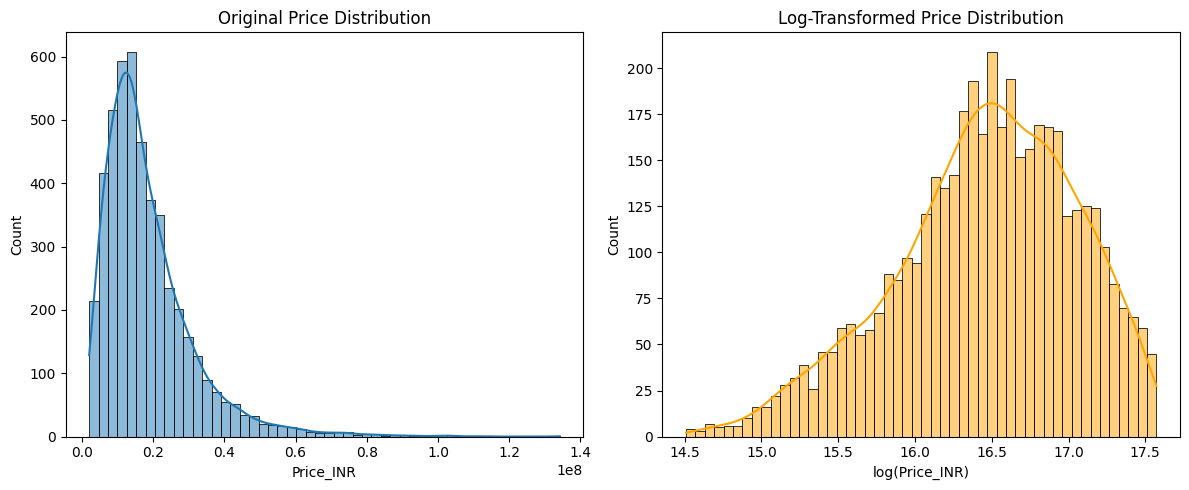

In [45]:
plt.figure(figsize=(12, 5))

# Original Price Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Price_INR'], bins=50, kde=True)
plt.title('Original Price Distribution')
plt.xlabel('Price_INR')

# Log-Transformed Price Distribution
plt.subplot(1, 2, 2)
sns.histplot(df_temp['Price_INR'], bins=50, kde=True, color='orange')
plt.title('Log-Transformed Price Distribution')
plt.xlabel('log(Price_INR)')

plt.tight_layout()
plt.show()

In [62]:
# Standard Scaling

scaler = StandardScaler()

df_temp['BuiltUpArea_sqft'] = scaler.fit_transform(df_temp[['BuiltUpArea_sqft']])
df_temp['Floor'] = scaler.fit_transform(df_temp[['Floor']])

# Feature Selection
### Recursive Feature Elimination

"The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute (such as coef_, feature_importances_) or callable. Then, the least important features are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached." -from scikit-learn.org

In [46]:
#importing the necessary libraries
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

RFE works by iteratively training a linear model on all features, evaluating its importance based on model perfromance and then based on the score, it eliminates the non-important features.

In [75]:
# defining X and y variables were X consists of all columns but target, while y is target variable
data = df_temp
X = data.drop('Price_INR', axis=1)
y = data['Price_INR']
feature_names = X.columns

# using Linear Regression model
estimator = LinearRegression()

# the iteration once 15 features will be selected will stop
rfe = RFE(estimator, n_features_to_select=15, step=1)

# Fitting RFE to the data
rfe.fit(X, y)

# the selected feature indices and names
selected_indices_rfe = np.where(rfe.support_)[0]
selected_features_rfe = feature_names[selected_indices_rfe]

print(f"RFE selected features: {selected_features_rfe}")

# Applying the selection to rfe
X_rfe = X.iloc[:, selected_indices_rfe]

RFE selected features: Index(['BHK', 'BuiltUpArea_sqft', 'City_Bengaluru', 'City_Chennai',
       'City_Delhi NCR', 'City_Hyderabad', 'City_Kolkata', 'City_MMR',
       'City_Pune', 'PropertyType_Independent House', 'PropertyType_Penthouse',
       'PropertyType_Row House', 'PropertyType_Studio', 'PropertyType_Villa',
       'Furnishing_Unfurnished'],
      dtype='object')


# Feature Evaluation

In [76]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Finding out the feature importance

In [77]:
importance = abs(model.coef_)
feature_importance = pd.DataFrame({
    'Feature': selected_features_rfe,
    'Importance': importance
}).sort_values('Importance', ascending=False)
print(feature_importance)

                           Feature  Importance
7                         City_MMR    1.130233
2                   City_Bengaluru    0.576341
4                   City_Delhi NCR    0.575312
3                     City_Chennai    0.546090
8                        City_Pune    0.534129
5                   City_Hyderabad    0.442465
12             PropertyType_Studio    0.432320
6                     City_Kolkata    0.398349
1                 BuiltUpArea_sqft    0.357203
10          PropertyType_Penthouse    0.238400
13              PropertyType_Villa    0.117995
9   PropertyType_Independent House    0.077714
11          PropertyType_Row House    0.077562
0                              BHK    0.074206
14          Furnishing_Unfurnished    0.044973


In [78]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")

Mean Squared Error: 0.02
R² Score: 0.942


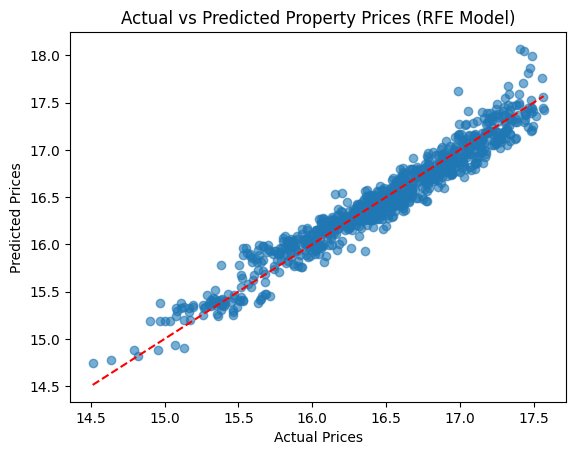

In [79]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Property Prices (RFE Model)")
plt.show()

### Creating two segments : Luxury and Non-Luxury Houses based on price
The feature subset contains metropolitan cities and penthouse building type. To make sure that prices of these variables being high is not dominating the feature selection we have created two segments based on price, where the price of houses in 0.9 quantile is selected as luxury and others as non-luxury. We've then again conducted feature selection on both segments separately and then evaluated the model using OLS.

In [80]:
df_temp1 = df_temp.copy()
threshold = df_temp['Price_INR'].quantile(0.90)  # top 10% most expensive
df_temp1['LuxuryFlag'] = np.where(df_temp['Price_INR'] >= threshold, 'Luxury', 'Non-Luxury')

In [81]:
X_seg = df_temp1.drop(columns=['Price_INR', 'LuxuryFlag'])  # drop target & flag
y_seg = df_temp1['Price_INR']

In [85]:
# Separate data
luxury_df = df_temp1[df_temp1['LuxuryFlag'] == 'Luxury']
non_luxury_df = df_temp1[df_temp1['LuxuryFlag'] == 'Non-Luxury']

# Function to run RFE
def run_rfe(X_seg, y_seg, n_features=10):
    model = LinearRegression()
    selector = RFE(model, n_features_to_select=n_features)
    selector.fit(X_seg, y_seg)

    selected_features = X_seg.columns[selector.support_]
    rankings = pd.DataFrame({
        'Feature': X_seg.columns,
        'Rank': selector.ranking_,
        'Selected': selector.support_
    }).sort_values('Rank')

    return selected_features, rankings

# Run for both groups
lux_X = luxury_df.drop(columns=['Price_INR' ,'LuxuryFlag'])
lux_y = luxury_df['Price_INR']

nonlux_X = non_luxury_df.drop(columns=['Price_INR', 'LuxuryFlag'])
nonlux_y = non_luxury_df['Price_INR']

lux_feats, lux_ranks = run_rfe(lux_X, lux_y, n_features=10)
nonlux_feats, nonlux_ranks = run_rfe(nonlux_X, nonlux_y, n_features=10)

print("Top Luxury Features:\n", lux_feats)
print("\nTop Non-Luxury Features:\n", nonlux_feats)


Top Luxury Features:
 Index(['BuiltUpArea_sqft', 'Longitude', 'City_Chennai', 'City_Hyderabad',
       'City_Kolkata', 'City_MMR', 'City_Pune',
       'PropertyType_Independent House', 'PropertyType_Penthouse',
       'PropertyType_Villa'],
      dtype='object')

Top Non-Luxury Features:
 Index(['BuiltUpArea_sqft', 'City_Bengaluru', 'City_Chennai', 'City_Delhi NCR',
       'City_Hyderabad', 'City_Kolkata', 'City_MMR', 'City_Pune',
       'PropertyType_Penthouse', 'PropertyType_Studio'],
      dtype='object')


In [88]:
import statsmodels.api as sm

def evaluate_segment(X_seg, y_seg):
    X_const = sm.add_constant(X_seg)
    model = sm.OLS(y_seg, X_const).fit()
    return model.rsquared, model.params.sort_values(ascending=False)

# Run for both groups
lux_X = luxury_df[lux_feats]
lux_y = luxury_df['Price_INR']
lux_r2, lux_coeff = evaluate_segment(lux_X, lux_y)

nonlux_X = non_luxury_df[nonlux_feats]
nonlux_y = non_luxury_df['Price_INR']
nonlux_r2, nonlux_coeff = evaluate_segment(nonlux_X, nonlux_y)

print("Luxury R²:", round(lux_r2, 3))
print("Non-Luxury R²:", round(nonlux_r2, 3))
print("\nTop Coefficients (Luxury):\n", lux_coeff)
print("\nTop Coefficients (Non-Luxury):\n", nonlux_coeff)

Luxury R²: 0.463
Non-Luxury R²: 0.927

Top Coefficients (Luxury):
 const                             12.605487
City_MMR                           0.504219
City_Pune                          0.178639
BuiltUpArea_sqft                   0.125512
PropertyType_Penthouse             0.100084
Longitude                          0.057921
PropertyType_Villa                 0.054847
PropertyType_Independent House    -0.040457
City_Hyderabad                    -0.143510
City_Chennai                      -0.179553
City_Kolkata                      -0.731967
dtype: float64

Top Coefficients (Non-Luxury):
 const                     15.975659
City_MMR                   1.111824
City_Bengaluru             0.589709
City_Delhi NCR             0.588097
City_Chennai               0.558817
City_Pune                  0.538779
BuiltUpArea_sqft           0.458946
City_Hyderabad             0.442770
City_Kolkata               0.400377
PropertyType_Penthouse     0.243986
PropertyType_Studio       -0.485001
dtype

Luxury	  
The model explains only 46% of variation — meaning luxury prices also depend on some other variables like interiors, scenic view, neighbourhood area/amenities like gyms and landscaped gardens, etc  
Non-Luxury	  
Explains 92%  of price variation — meaning non-luxury housing prices follow clear, measurable patterns (size, city, property type, etc).  
So, selected features are correct and apt for prediciting prices.

# Summary

1) Data Extraction -  
  > data is extracted directly from kaggle using kagglehub and pandas, since the dataset contains many files, the one relevant are extracted to panda dataframes and then merged for further analysis.

2) Data Audit & Availability Check -

> we checked the dataset's   
>> shape,   
>> information,  
>> missing values, missing values percent,   
>> duplicate values and   
>> unique counts in each attribute.  

> The dataset contains sufficient variables for prediciting house prices  

3) Exploratory Data Analysis -
> Dataset's summary statistics and   
> variate analaysis using visualizations was done.
>> We have used seaborn and matplot libraries for visualizing countplots, KDE plots, box plots, scatter plots, barplots and correation heatmap for variables and understanding the relationships as well as any other information we can conclude from the visuals.  

4) Data Cleaning -   
> From steps done before in data auditing and EDA we first reduced the data by dropping columns and rows.   
> We then imputed the missing values using various methods like forward/backward fills and mean, median, mode.   
> Then outliers were found out and rows with outliers were removed.  

5) Feature Transformation -   
> Encoding of categorical variables, by creating dummy variables and  
> Log Transformation of Price_INR variable  

6) Feature Selection -
> Using Recursive Feaure Elimination (wrapper method) a subset of 10 features is selected.  

7) Feature Evaluation -   
> Feature importance
> training and testing the data on regression model to check for R^2 and RMSE score for the selected features.  

8) Feature check  
> -to check if the high price of selected features wasn't dominating the model, two segments created based on value of price: luxury and non-luxury houses,  
> -again RFE was used on both segments separately and evaluated.